In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.datasets import fetch_openml

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import classification_report, accuracy_score

In [2]:
mnist = fetch_openml('mnist_784', version = 1, cache = True, as_frame = False)
print(mnist.DESCR)


**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [3]:
X = mnist["data"]
y = mnist["target"].astype(np.uint8)

In [4]:
type(X)

numpy.ndarray

In [5]:
type(y)

numpy.ndarray

In [6]:
X.shape

(70000, 784)

In [7]:
y.shape

(70000,)

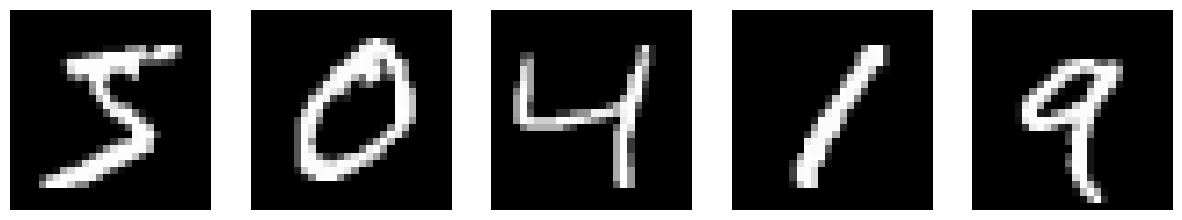

In [8]:
# Visa de första 5 bilderna i datasetet
fig, axes = plt.subplots(1, 5, figsize=(15, 15))
for i in range(5):
    axes[i].imshow(X[i].reshape(28, 28),  cmap='gray') 
    axes[i].axis('off')  
plt.show()

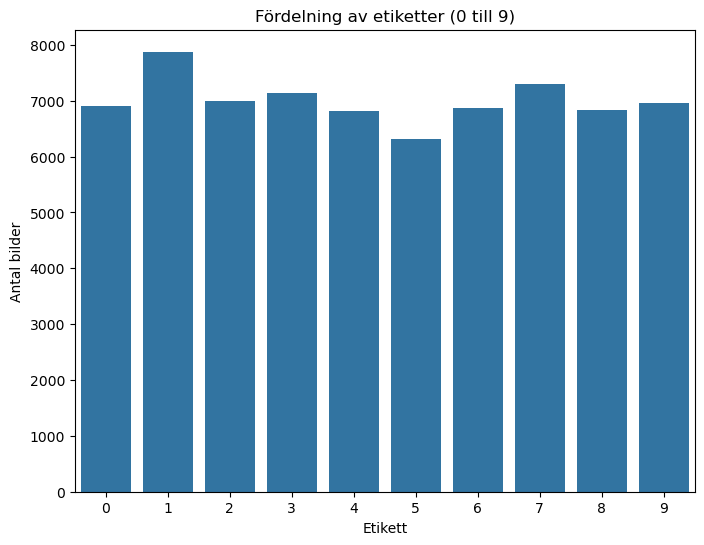

In [9]:
# visar hur många bilder vi har för varje etikett. 
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.title('Fördelning av etiketter (0 till 9)')
plt.xlabel('Etikett')
plt.ylabel('Antal bilder')
plt.show()

In [10]:
#Dela upp data i träning, validering och test set.
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=10000, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=10000, random_state=42)

In [11]:
#Standardiserar data 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
RBF_svm_clf = SVC(random_state=42)

hyper_param_grid = [ {'kernel': ['rbf'], 'gamma': [1, 2], 'C': [0.5, 1.5]}] 

RBF_clf = GridSearchCV(RBF_svm_clf, hyper_param_grid, cv=2, n_jobs=-1)

RBF_clf.fit(X_train_scaled, y_train)


print("Best parameters found:", RBF_clf.best_params_)
print("Best cross-validation score:", RBF_clf.best_score_)

y_val_pred = RBF_clf.predict(X_val_scaled)


val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation accuracy: {val_accuracy:.4f}")

Best parameters found: {'C': 0.5, 'gamma': 1, 'kernel': 'rbf'}
Best cross-validation score: 0.11134
Validation accuracy: 0.1158


In [ ]:
lin_svm_clf = SVC(random_state=42)

hyper_param_grid = [{'kernel': ['linear'], 'C': [0.5, 1.5]}]
    
lin_clf = GridSearchCV(lin_svm_clf, hyper_param_grid, cv=2)

lin_clf.fit(X_train_scaled, y_train)


print("Best parameters found:", lin_clf.best_params_)
print("Best cross-validation score:", lin_clf.best_score_)

y_val_pred = lin_clf.predict(X_val_scaled)


val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation accuracy: {val_accuracy:.4f}")

Best parameters found: {'C': 0.5, 'kernel': 'linear'}
Best cross-validation score: 0.9171
Validation accuracy: 0.9232


In [17]:
random_forest_clf = RandomForestClassifier(random_state=42)

hyper_param_random_forest = [{'n_estimators': [100], 'max_depth': [10, 20]}]

grid_search_random = GridSearchCV(random_forest_clf, hyper_param_random_forest, cv=3)

grid_search_random.fit(X_train, y_train)

print("best cross-validation score:", grid_search_random.best_score_)

# Utvärdera modellerna på valideringsdatan
rf_best_model = grid_search_random.best_estimator_

rf_predictions = rf_best_model.predict(X_val)

rf_accuracy = accuracy_score(y_val, rf_predictions)

print(f"Random Forest accuracy: {rf_accuracy:.4f}")



best cross-validation score: 0.9643200487724316
Random Forest accuracy: 0.9690


In [18]:
#Refit random Forest modell då den gav bäst resultat 
random_forest_clf.fit(X_train_val, y_train_val)

RandomForestClassifier(random_state=42)

In [ ]:
y_test_pred = random_forest_clf.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Test accuracy: {test_accuracy:.4f}")

Test accuracy: 0.9674


In [20]:
print("Random Forest Classification Report:\n", classification_report(y_test, y_test_pred))

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       983
           1       0.99      0.99      0.99      1152
           2       0.94      0.97      0.96       967
           3       0.96      0.95      0.95      1034
           4       0.96      0.97      0.97       906
           5       0.98      0.96      0.97       937
           6       0.98      0.99      0.98       961
           7       0.97      0.97      0.97      1055
           8       0.96      0.95      0.96       969
           9       0.96      0.94      0.95      1036

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

